In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [6]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
D              3
              ..
D6             1
F E69          1
B4             1
D56            1
B79            1
Name: Cabin, Length: 147, dtype: int64

In [7]:
corr_matrix = df.corr()
print(corr_matrix['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


<AxesSubplot:>

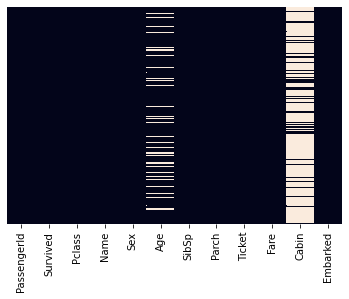

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.shape

(891, 12)

In [13]:
train_label = df['Survived']

In [14]:
train_features = df.drop(['Survived'], axis=1)

In [15]:
train_features.shape

(891, 11)

In [16]:
train_features.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode())
columns = ['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin']

In [18]:
len(columns)

5

In [19]:
df.shape

(891, 12)

In [20]:
train_label.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [21]:
test_df = pd.read_csv('concate.csv')

In [22]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [23]:
train_features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [24]:
final_df = pd.concat([train_features, test_df], axis=0)

In [25]:
columns

['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin']

In [26]:
def category_onehot_multcols(multcolumns):          # takes list of categorical columns
    df_final = final_df                       # creating reference for new dataset
    i = 0
    for fields in multcolumns:

        print(fields)
        df1 = pd.get_dummies(final_df[fields], drop_first=True)  # drop first drops first column of dummies
        # getting dummies of categorical features and set to dummies dataset

        final_df.drop([fields], axis=1, inplace=True)           # delete that column from old dataset
        if i == 0:
            df_final = df1.copy()                       # for first time dummies dataset set in new dataset
        else:
            df_final = pd.concat([df_final, df1], axis=1)   # concatenate new data with dummies dataset
        i = i + 1

    df_final = pd.concat([final_df, df_final], axis=1)   # at end concatenate old dataset with new dataset

    return df_final

In [27]:
final_df = category_onehot_multcols(columns)

Name
Sex
Embarked
Ticket
Cabin


In [28]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [29]:
final_df.shape

(1309, 2428)

In [30]:
final_Train_data = final_df.iloc[:891, :]
final_Test_data = final_df.iloc[891:, :]

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
final_Train_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Abbott, Master. Eugene Joseph","Abbott, Mr. Rossmore Edward","Abbott, Mrs. Stanton (Rosa Hunt)","Abelseth, Miss. Karen Marie",...,F E57,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,1,3,22.000000,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,38.000000,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,26.000000,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,35.000000,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,35.000000,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,888,1,19.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,889,3,29.699118,1,2,23.4500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,890,1,26.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
hyperparameter_grid = {
    'penalty' : ['l2'],
    'dual':[False],
    'tol':[0.0001],
    'C':[1.0],
    'fit_intercept':[True],
    'intercept_scaling':[1],
    'class_weight':[None], 'random_state':[None], 'solver':['lbfgs'],
    'max_iter':[120], 'multi_class':['auto'], 'verbose':[0],
    'warm_start':[False], 'n_jobs':[None], 'l1_ratio':[None]
}

In [37]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=50,
                               scoring='neg_mean_absolute_error', n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

random_cv.fit(final_Train_data, train_label)
print(random_cv.best_estimator_)

c:\python 38\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    5.9s remaining:    8.9s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    6.7s finished


LogisticRegression(max_iter=120)


c:\python 38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
model = LogisticRegression(max_iter=120)

In [39]:
model.fit(final_Train_data, train_label)

c:\python 38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=120)

In [40]:
import pickle
filename = 'hyper logistic regression2.pkl'
pickle.dump(model, open(filename, 'wb'))

In [41]:
prediction = model.predict(final_Test_data)
print(prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [42]:
pred = pd.DataFrame(prediction)           # convert into dataframe
sub_df = pd.read_csv('gender_submission.csv')
datasets = pd.concat([sub_df['PassengerId'], pred], axis=1)
datasets.columns = ['PassengerId', 'Survived']              # column names set as ID and Salesprice
datasets.to_csv('hyper_Titanic_Submission2.csv', index=False)